In [234]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data plotting and visualisation
import seaborn as sns #data plotting and visualisation

import opendatasets as od #to download dataset
od.download("https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction")

Skipping, found downloaded files in ".\bank-customer-churn-prediction" (use force=True to force download)


In [235]:
#loading the dataset

dataset = pd.read_csv("bank-customer-churn-prediction/Churn_Modelling.csv")
print(dataset.head(5))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [236]:
from sklearn.preprocessing import LabelEncoder
enc1 = LabelEncoder()
enc2 = LabelEncoder()

to_drop = ['RowNumber','CustomerId','Exited','Surname'] #thest features will be dropped 
x = dataset.drop(to_drop,axis=1)

#encoded features - Gender,Geography
x['Geography'] = enc1.fit_transform(x['Geography'])
x['Gender'] = enc2.fit_transform(x['Gender'])

y = dataset['Exited']
print(x.head(5))

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  


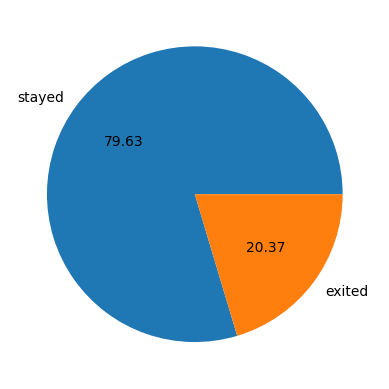

In [237]:
#displaying percentage of exited customers

data = y.value_counts()
plt.pie(data,labels=['stayed','exited'],autopct='%.2f')
plt.show()

In [238]:
#libraries for training and evaluation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [239]:
#train-test split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=20)

In [240]:
#applying standard scaler on train and test data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train_x = scale.fit_transform(train_x)
test_x = scale.transform(test_x)

In [241]:
#models to be evaluated

GB = GradientBoostingClassifier()
LR = LogisticRegression(penalty='l1',solver='liblinear')
RF = RandomForestClassifier(n_estimators=150)

In [242]:
#evaluation function to display accuracy,precision,recall,F1_score and confusion matrix

def evaluate(model):
    model.fit(train_x,train_y)
    pred_y = model.predict(test_x)
    print("accuracy : ",accuracy_score(test_y,pred_y))
    print("precision : ",precision_score(test_y,pred_y))
    print("recall : ",recall_score(test_y,pred_y))
    print("F1_score : ",f1_score(test_y,pred_y))
    matrix = confusion_matrix(test_y, pred_y)
    sns.heatmap(matrix,annot=True)
    plt.show()

Gradient Boosting Classifier - 
accuracy :  0.8693333333333333
precision :  0.7712609970674487
recall :  0.4558058925476603
F1_score :  0.5729847494553377


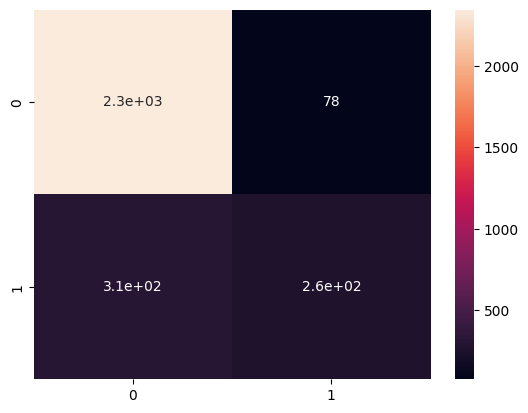

In [243]:
print("Gradient Boosting Classifier - ")
evaluate(GB)

Random Forest Classifier (n_estimators = 150) - 
accuracy :  0.864
precision :  0.744927536231884
recall :  0.44540727902946275
F1_score :  0.5574837310195228


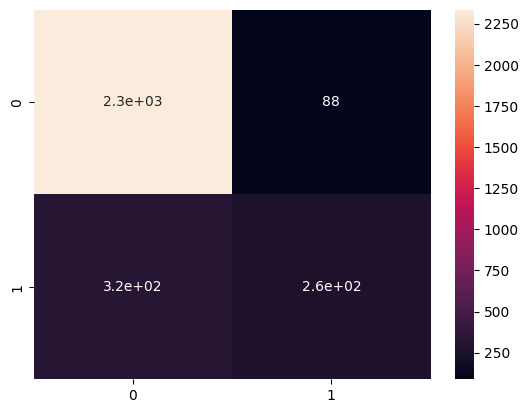

In [244]:
print("Random Forest Classifier (n_estimators = 150) - ")
evaluate(RF)

Logistic Regression (penalty='l1',solver='liblinear') - 
accuracy :  0.8096666666666666
precision :  0.5168539325842697
recall :  0.15944540727902945
F1_score :  0.24370860927152319


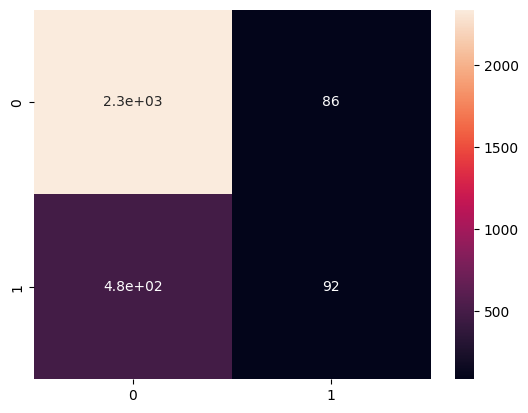

In [245]:
print("Logistic Regression (penalty='l1',solver='liblinear') - ")
evaluate(LR)